In [6]:
# Notebook: Regions plots
# Description: Plots TSS regions of AIM2 and DTX3L genes using all available kohorts.

In [7]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [29]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [30]:
# Load mynorm

In [31]:
mynorm = pd.read_csv("../data/processed/CorrectedMyNorms/mynorm_ALL.csv", index_col=0)

In [32]:
# EPIC manifest

In [33]:
epic = pd.read_csv(
    "../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    index_col=0,
    low_memory=False,
)

In [34]:
epic = epic[["UCSC_RefGene_Name", "UCSC_RefGene_Group", "MAPINFO", "CHR"]].dropna()
epic

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO,CHR
IlmnID,,,,
cg07881041,PTPRS;PTPRS;PTPRS;PTPRS,Body;Body;Body;Body,5236016.0,19
cg18478105,YTHDF1,TSS200,61847650.0,20
cg09835024,EIF2S3,TSS1500,24072640.0,X
cg05451842,ITPK1;ITPK1;ITPK1,Body;Body;Body,93581139.0,14
cg09838562,JARID2;JARID2-AS1;JARID2,TSS1500;Body;Body,15248173.0,6
...,...,...,...,...
cg10615271,ACVR1B,3'UTR,52388360.0,12
cg23079522,PPM1L,Body,160569628.0,3
cg16818145,MCCC1,Body,182782277.0,3


In [35]:
# Extract probes in AIM2 and DTX3L TSS200 or TSS1500

In [36]:
probes = epic[
    (epic["UCSC_RefGene_Name"].str.contains("^AIM2|PARP9|DTX3L"))
    & (epic["UCSC_RefGene_Group"].str.contains("TSS1500|TSS200"))
]
probes

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO,CHR
IlmnID,,,,
cg27291138,PARP9;PARP9;PARP9;PARP9;DTX3L;PARP9;PARP9,TSS1500;TSS1500;TSS200;TSS1500;Body;TSS200;TSS...,122283635.0,3
cg17515347,AIM2,TSS1500,159047163.0,1
cg18332752,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,TSS1500;TSS1500;TSS1500;TSS1500;TSS200;TSS200;...,122283681.0,3
cg24426936,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500;TSS150...,122284521.0,3
cg10668555,PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L;PARP9;PARP...,TSS1500;1stExon;5'UTR;TSS1500;1stExon;Body;TSS...,122283484.0,3
cg24145401,AIM2,TSS1500,159047177.0,1
cg14098385,PARP9;PARP9;DTX3L,TSS1500;TSS1500;Body,122285010.0,3
cg11406875,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L;PARP...,5'UTR;5'UTR;5'UTR;5'UTR;1stExon;1stExon;TSS200...,122283150.0,3
cg04154825,PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,TSS200;1stExon;5'UTR;TSS200;TSS200;5'UTR;TSS20...,122283252.0,3


In [37]:
# Overlap with mynorm

In [38]:
probes = probes.loc[set(probes.index).intersection(set(mynorm.index))].sort_values(
    "MAPINFO", ascending=True
)
probes

,UCSC_RefGene_Name,UCSC_RefGene_Group,MAPINFO,CHR
IlmnID,,,,
cg22930808,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9,5'UTR;5'UTR;TSS1500;5'UTR;5'UTR;5'UTR;5'UTR,122281881.0,3
cg08122652,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9,5'UTR;5'UTR;TSS1500;5'UTR;5'UTR;5'UTR;5'UTR,122281939.0,3
cg00959259,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9,5'UTR;5'UTR;TSS1500;5'UTR;5'UTR;5'UTR;5'UTR,122281975.0,3
cg07815522,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500,122282157.0,3
cg07916070,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9;PARP...,5'UTR;5'UTR;TSS200;5'UTR;1stExon;1stExon;5'UTR...,122283003.0,3
cg19270099,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9;PARP...,5'UTR;5'UTR;TSS200;5'UTR;1stExon;1stExon;5'UTR...,122283009.0,3
cg17804387,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9;PARP...,5'UTR;5'UTR;TSS200;5'UTR;1stExon;1stExon;5'UTR...,122283011.0,3
cg11406875,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L;PARP...,5'UTR;5'UTR;5'UTR;5'UTR;1stExon;1stExon;TSS200...,122283150.0,3
cg18715297,PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,TSS200;1stExon;5'UTR;TSS200;TSS200;5'UTR;TSS20...,122283210.0,3


In [39]:
mynorm = mynorm.loc[probes.index, :]

In [40]:
mynorm

,GSM5163416,GSM5163665,HB_Control_55,GSM5163545,GSM5163399,GSM5163452,GSM5163523,GSM5163719,GSM5163724,GSM5163501,...,HB_Control_56,HB_Control_5,GSM5163645,GSM5163539,GSM5163468,GSM5163752,GSM5163688,GSM5163557,GSM5163700,GSM5163558
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg22930808,0.637160,0.510159,0.627493,0.503524,0.406343,0.611488,0.487456,0.614475,0.304721,0.554596,...,0.601320,0.605403,0.595677,0.493715,0.484313,0.399153,0.604678,0.558947,0.400886,0.472369
cg08122652,0.728854,0.674567,0.787955,0.727455,0.644692,0.772628,0.730158,0.872974,0.708854,0.770480,...,0.778775,0.802378,0.759642,0.660485,0.703135,0.825397,0.796166,0.774172,0.666045,0.713529
cg00959259,0.395479,0.418143,0.471255,0.364244,0.312626,0.476485,0.464899,0.546770,0.522822,0.514267,...,0.511846,0.570303,0.468213,0.352067,0.436429,0.527674,0.457730,0.502394,0.385934,0.403003
cg07815522,0.647334,0.527278,0.602792,0.589694,0.568814,0.677292,0.588568,0.700118,0.553916,0.616719,...,0.608234,0.652743,0.649239,0.587741,0.614705,0.654826,0.675125,0.660683,0.528913,0.597455
cg07916070,0.019204,0.021798,0.010866,0.018284,0.023894,0.021164,0.014860,0.021768,0.029340,0.023674,...,0.023182,0.010633,0.020565,0.020091,0.019253,0.009071,0.023846,0.019052,0.026071,0.019110
cg19270099,0.021356,0.024287,0.018967,0.020537,0.021356,0.023025,0.014435,0.031996,0.035036,0.024086,...,0.018233,0.017636,0.029557,0.019349,0.018600,0.017472,0.025064,0.022194,0.030734,0.022775
cg17804387,0.019401,0.043987,0.029665,0.029436,0.035844,0.032967,0.027637,0.040109,0.034240,0.031461,...,0.035608,0.031930,0.036118,0.034132,0.030847,0.029474,0.042051,0.028556,0.055243,0.036446
cg11406875,0.144437,0.128983,0.119306,0.060715,0.176739,0.113450,0.176703,0.125721,0.182727,0.160912,...,0.124802,0.107219,0.103955,0.134199,0.180139,0.130794,0.175152,0.105240,0.129222,0.125418
cg18715297,0.163594,0.194324,0.135563,0.077649,0.126268,0.108515,0.124547,0.154964,0.196362,0.116325,...,0.113673,0.113064,0.171905,0.087679,0.129113,0.150778,0.162951,0.069736,0.194916,0.081436


In [41]:
poi = pd.read_csv("../data/raw/CONCATED_ALL/SampleSheetALL.csv", index_col=0)
poi

,Sentrix_ID,Sentrix_Position,Sample_Group
Sample_Name,,,
GSM5331993,204776840051,R01C01,USA-Covid-19
GSM5331994,204776840051,R02C01,USA-Covid-19
GSM5331995,204776840051,R03C01,USA-Covid-19
GSM5331996,204776840051,R04C01,USA-Covid-19
GSM5331997,204776840051,R05C01,USA-Covid-19
...,...,...,...
HB_Control_78,201236480089,R02C01,HB
HB_Control_79,201236480089,R03C01,HB
HB_Control_80,201236480089,R04C01,HB


In [42]:
mynorm = pd.concat((mynorm.T, poi.Sample_Group), axis=1)

In [43]:
mynorm

,cg22930808,cg08122652,cg00959259,cg07815522,cg07916070,cg19270099,cg17804387,cg11406875,cg18715297,cg11138794,...,cg00633969,cg25932713,cg14098385,cg00490406,cg17217296,cg10636246,cg07195224,cg17515347,cg24145401,Sample_Group
GSM5163416,0.637160,0.728854,0.395479,0.647334,0.019204,0.021356,0.019401,0.144437,0.163594,0.144662,...,0.975052,0.990598,0.945589,0.235565,0.734525,0.088756,0.076751,0.419931,0.380236,Spain
GSM5163665,0.510159,0.674567,0.418143,0.527278,0.021798,0.024287,0.043987,0.128983,0.194324,0.207007,...,0.949541,0.963251,0.916036,0.276478,0.490873,0.072946,0.096045,0.301699,0.313996,Spain
HB_Control_55,0.627493,0.787955,0.471255,0.602792,0.010866,0.018967,0.029665,0.119306,0.135563,0.129819,...,0.960209,0.974729,0.949415,0.423898,0.854952,0.128449,0.093570,0.572071,0.481278,HB
GSM5163545,0.503524,0.727455,0.364244,0.589694,0.018284,0.020537,0.029436,0.060715,0.077649,0.115869,...,0.969978,0.975867,0.909744,0.471107,0.776332,0.255940,0.135384,0.542712,0.436718,Spain
GSM5163399,0.406343,0.644692,0.312626,0.568814,0.023894,0.021356,0.035844,0.176739,0.126268,0.113655,...,0.965642,0.970783,0.907662,0.195373,0.391154,0.126567,0.124380,0.312061,0.244771,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5163752,0.399153,0.825397,0.527674,0.654826,0.009071,0.017472,0.029474,0.130794,0.150778,0.133393,...,0.975921,0.974053,0.912494,0.176593,0.812566,0.112259,0.111311,0.446463,0.355273,Spain
GSM5163688,0.604678,0.796166,0.457730,0.675125,0.023846,0.025064,0.042051,0.175152,0.162951,0.102481,...,0.979054,0.980964,0.934719,0.323722,0.816165,0.157456,0.098490,0.504882,0.445992,Spain
GSM5163557,0.558947,0.774172,0.502394,0.660683,0.019052,0.022194,0.028556,0.105240,0.069736,0.116998,...,0.971517,0.974368,0.947457,0.358639,0.745067,0.150692,0.109192,0.549800,0.399131,Spain
GSM5163700,0.400886,0.666045,0.385934,0.528913,0.026071,0.030734,0.055243,0.129222,0.194916,0.140557,...,0.961723,0.966549,0.911374,0.251576,0.665010,0.059079,0.081085,0.278247,0.251828,Spain


In [44]:
mynorm.Sample_Group.unique()

array(['Spain', 'HB', 'USA-Covid-19', 'USA-Non-Covid-19', 'PL'],
      dtype=object)

In [45]:
mynorm.Sample_Group = mynorm.Sample_Group.map(
    {
        "Spain": "COVID-19 SPAIN",
        "HB": "Healthy",
        "USA-Covid-19": "COVID-19 USA",
        "USA-Non-Covid-19": "non-COVID-19 USA",
        "PL": "COVID-19 PL",
    }
)

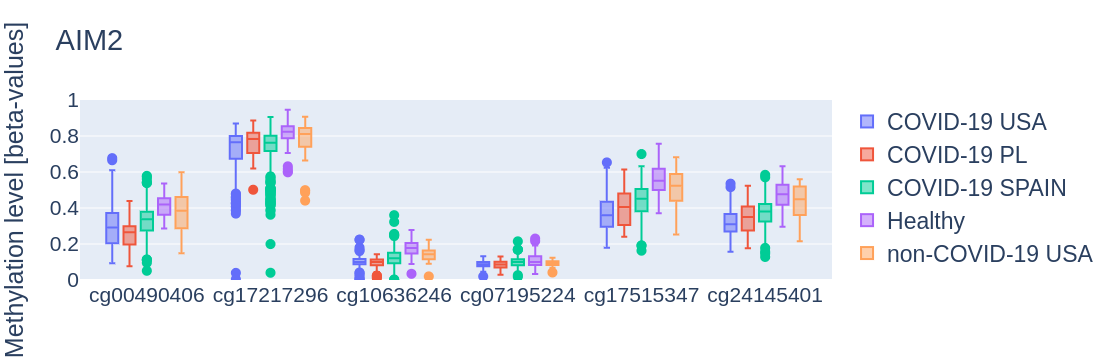

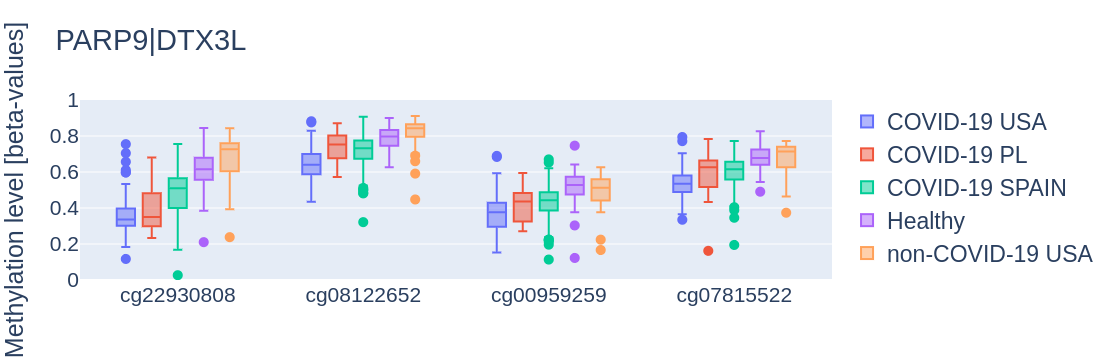

In [49]:
genes = ["AIM2", "PARP9|DTX3L"]

for gene in genes:

    # Create plot
    fig = go.Figure()

    # Get porbes in TSS of gene and sort using MAPINFO
    data = (
        probes[probes["UCSC_RefGene_Name"].str.contains(gene)]
        .sort_values("MAPINFO", ascending=True)
        .index.tolist()
    )
#     if gene == "PARP9|DTX3L": zoom
#         data = ["cg22930808", "cg08122652", "cg00959259", "cg07815522"]
    data.append("Sample_Group")
    fig = px.box(
        mynorm[data],
        color="Sample_Group",
        labels={"value": "Methylation level [beta-values]", "variable": ""},
        range_y=[0, 1],
        title=f"{gene}",
        category_orders={
            "Sample_Group": [
                "COVID-19 USA",
                "COVID-19 PL",
                "COVID-19 SPAIN",
                "Healthy",
                "Non-COVID-19 USA",
            ]
        },
    )

    fig.update_layout(legend=dict(font=dict(size=23), title=""), font=dict(size=21))
    fig.update_traces(marker=dict(size=10))

    fig.write_image(f"../Plots/Corrected_{gene}.jpg")
    fig.show()